In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import csv

KeyboardInterrupt: 

In [ ]:
#Creating file names for each .csv file in the folder # Balmer Line Data. I am not sure how to write code that goes through each folder and registers each .csv file, so I just wrote them out manually
data_names={
    1:['HD_080930_013.csv', 'HD_080930_012.csv', 'HD_080930_011.csv', 'HD_080930_010.csv', 'HD_080930_009.csv', 'HD_080930_008.csv', 'HD_080930_007.csv', 'HD_080930_006.csv', 'HD_080930_005.csv', 'HD_080930_004.csv', 'HD_080930_003.csv'],
    2:['HD_081002_001.csv', 'HD_081002_002.csv', 'HD_081002_003.csv', 'HD_081002_004.csv', 'HD_081002_005.csv', 'HD_081002_006.csv'],
    3:['HD_081002_007.csv', 'HD_081002_009.csv', 'HD_081002_010.csv','HD_081002_011.csv','HD_081002_012.csv'], #May have error due to that one bad data?
    4:['HD_081002_013.csv']
}

#Empty dictionary for path, lambda (first column), and intensity (second column)
path_Balmer_folder={}
raw_Marks_Balmer_={}
intensity_Balmer_={}

#range (1,5) because the data goes from 1 to 4
for Balmer_number in range (1,5):
  path_Balmer_folder[Balmer_number]=f"/content/drive/MyDrive/Lab Physics/HD Lab Data/{Balmer_number} Balmer Line Data" #Defining the path up until the individual .csv files
  raw_Marks_Balmer_[Balmer_number]=[] #empty lists for each wavelength values
  intensity_Balmer_[Balmer_number]=[] #empty lists for each intensity values

'''
This function goes through each folder (Balmer Lines) and enumerates each file.
Returns the uninterpolated marks and intensities
'''
def read_data():

  for Balmer_number in range (1,5):
    path_Balmer_folder[Balmer_number]=f"/content/drive/MyDrive/Lab Physics/HD Lab Data/{Balmer_number} Balmer Line Data" #Defining the path up until the individual .csv files
    raw_Marks_Balmer_[Balmer_number]=[] #empty lists for each wavelength values
    intensity_Balmer_[Balmer_number]=[] #empty lists for each intensity values

  for Balmer_number in range (1,5):
    for file_number, data_name in enumerate(data_names[Balmer_number], start=1):
      path=f"{path_Balmer_folder[Balmer_number]}/{data_name}"
      #print(f"Reading file: {path}") #this line checks that the .csv files are being read as should be intended

      try:
        data=np.genfromtxt(path, delimiter=",", skip_header=1)
        marks=data[:, 0]
        intensities=data[:, 1]
        raw_Marks_Balmer_[Balmer_number].append(marks)
        intensity_Balmer_[Balmer_number].append(intensities)
      except FileNotFoundError: #without this line, the "try" line does not work
        print(f"No data named {path}")

    #print(f"{len(data_names[Balmer_number])} in {Balmer_number} Balmer Line folder)")

  return raw_Marks_Balmer_, intensity_Balmer_

#read_data()
#print(marks_Balmer_)
#print(intensity_Balmer_)

Indices of the peaks: [136 171]
Properties: {'peak_heights': array([2.836093, 2.786861]), 'prominences': array([2.822904, 2.428137]), 'left_bases': array([ 28, 153]), 'right_bases': array([213, 213])}
Values of peaks are [6006.74166667 6008.78333333]
Indices of the peaks: [150 185]
Properties: {'peak_heights': array([2.801594, 2.823968]), 'prominences': array([2.4337  , 2.812022]), 'left_bases': array([11, 11]), 'right_bases': array([168, 240])}
Values of peaks are [6006.82352941 6008.88235294]
Indices of the peaks: [112 146]
Properties: {'peak_heights': array([2.783744, 2.764915]), 'prominences': array([2.773917, 2.398101]), 'left_bases': array([ 19, 129]), 'right_bases': array([237, 237])}
Values of peaks are [6006.67346939 6008.75510204]
Indices of the peaks: [136 170]
Properties: {'peak_heights': array([2.766525, 2.719556]), 'prominences': array([2.753743, 2.358957]), 'left_bases': array([  3, 149]), 'right_bases': array([221, 221])}
Values of peaks are [6006.61111111 6008.5       

<ipython-input-85-66249b8e2206>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,3))


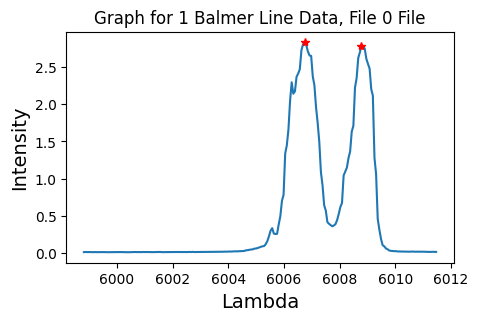

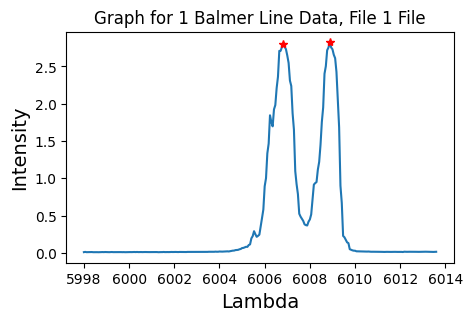

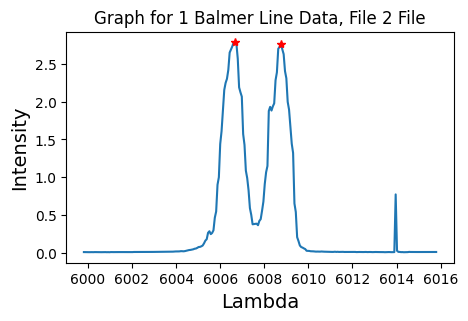

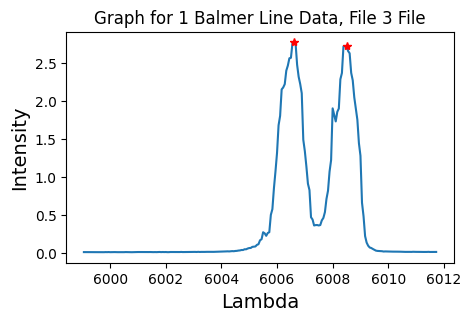

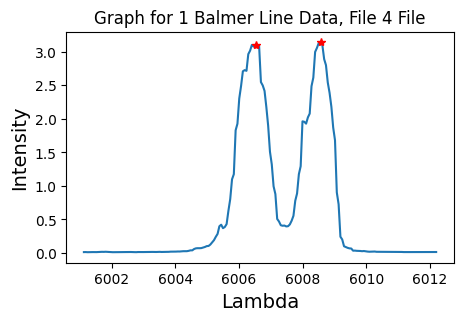

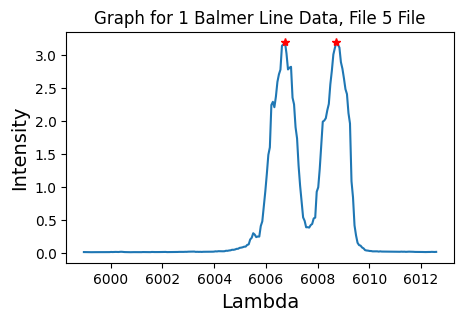

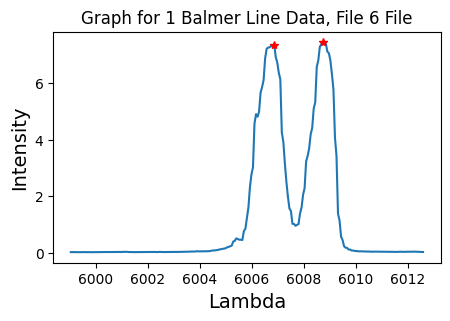

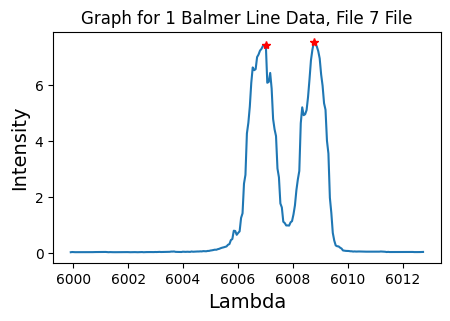

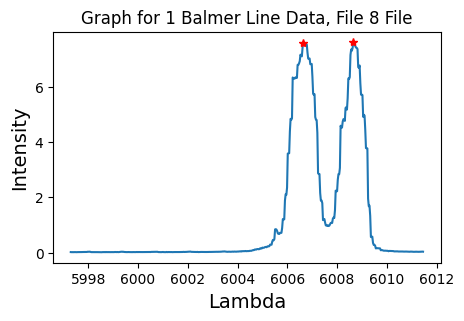

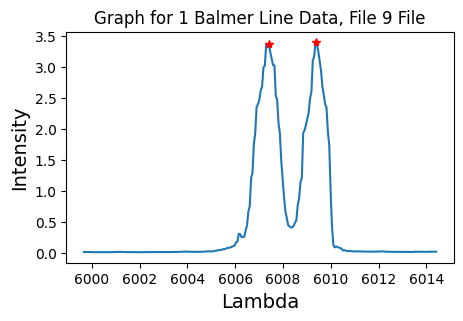

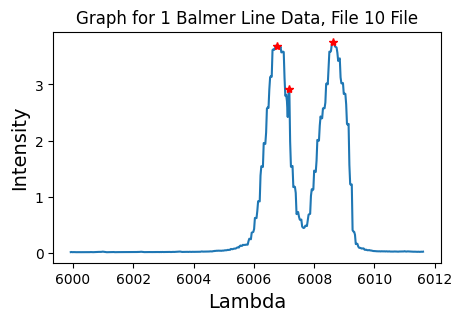

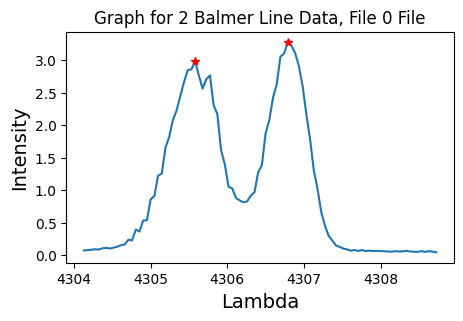

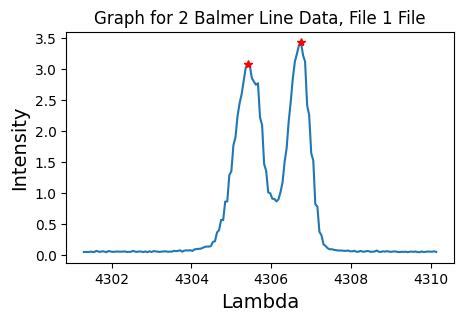

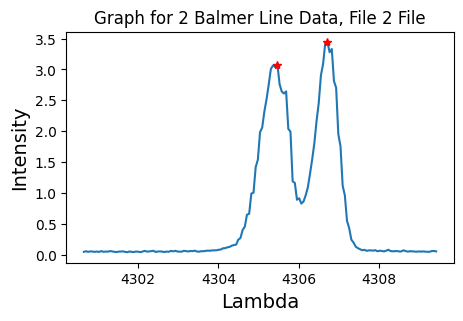

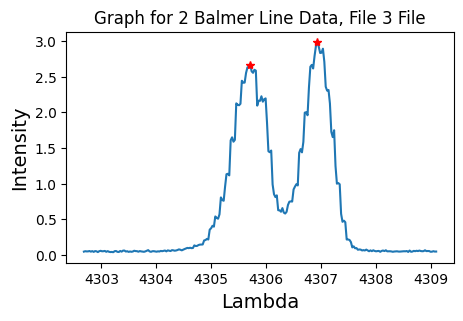

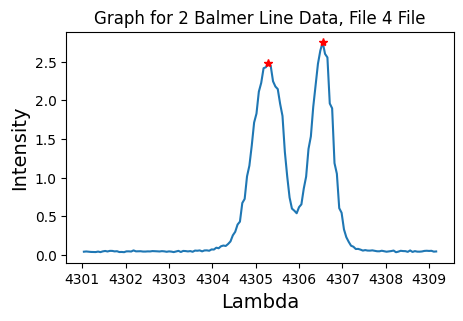

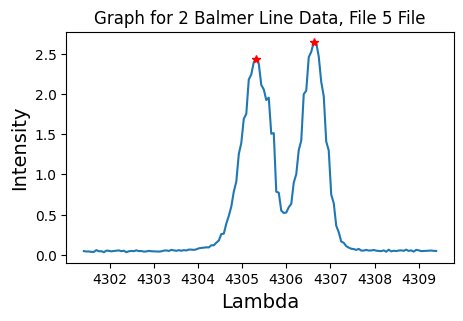

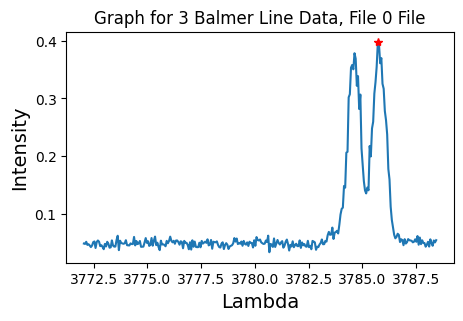

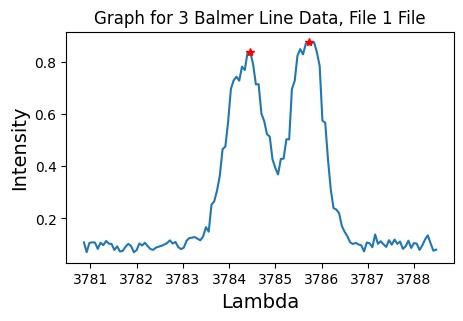

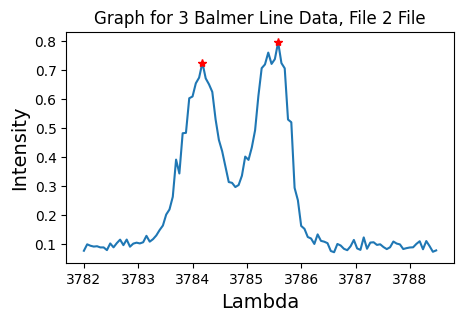

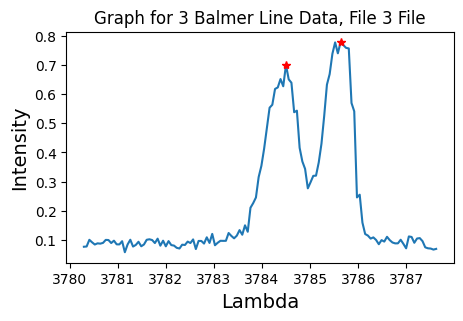

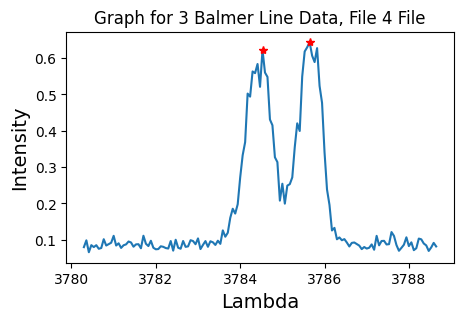

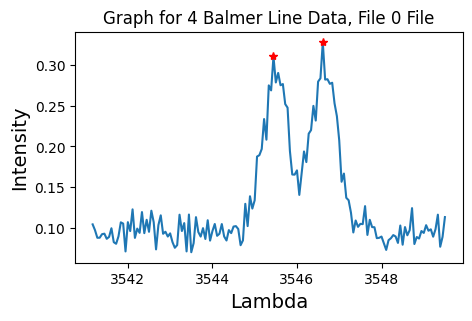

In [ ]:
'''
Being clear on the interpolated vs. not data
'''
unscaled_mark, intensity=read_data()

'''
Interpolates based on the two marks. Should go through every file without problem.
'''
def scale_x_axis(input): #I have not done intrapolation before so I am crediting Dylan with this code
  mark_index=np.where(~np.isnan(input))[0]
  mark_value=input[mark_index]
  angstroms_per_tick = (mark_value[1] - mark_value[0]) / (mark_index[1] - mark_index[0])
  scaled_lambda = mark_value[0] + angstroms_per_tick * (np.arange(len(input)) - mark_index[0])
  return scaled_lambda

'''
Graphs and marks peaks
'''
def graph_peaks(unscaled_mark, intensity):
  peaks_values={}
  for folder_index in unscaled_mark.keys(): #for each folder in the big lambda dictionary, so 1, 2, 3, and 4 Balmer Line Data
    #print(folder_index)
    for file_number, marks_array in enumerate(unscaled_mark[folder_index]):
      try:
        scaled_lambda=scale_x_axis(marks_array) #interpolating
        x_data=scaled_lambda
        y_data=intensity[folder_index][file_number]
        plt.figure(figsize=(5,3))
        plt.title(f"Graph for {folder_index} Balmer Line Data, File {file_number} File")
        plt.plot(x_data, y_data, label="Data")
        plt.xlabel("Lambda", fontsize = 14)
        plt.ylabel("Intensity", fontsize = 14)

        if folder_index==1:
          prom=0.39
          height=2
          dist=1
        if folder_index==2:
          prom=0.35
          height = 0.25
          dist=3
        if folder_index==3:
          prom=0.35
          height = 0.2
          dist=1
        if folder_index==4:
          prom=0.1
          height= 0.25
          dist=None

        peaks, properties = sp.signal.find_peaks(y_data, prominence=prom, height = height, distance=dist) #What should I set the prominence to?
        print("Indices of the peaks:", peaks)
        print("Properties:", properties)
        x_peaks = x_data[peaks]
        y_peaks = y_data[peaks]
        plt.plot(x_peaks, y_peaks, 'r*')

        if len(x_peaks)==2: #This is to make sure that if there are not two peaks found (I tried my best to set the parameters of finding peaks, but it seems that for some files it is just impossible.
          if folder_index not in peaks_values:
            peaks_values[folder_index]=[]
          peaks_values[folder_index].append(list(x_peaks))
        print(f"Values of peaks are {x_peaks}")

      except ValueError:
        print(f"Error")

  return peaks_values

peaks_values=graph_peaks(unscaled_mark, intensity)
print(peaks_values)
print(f"Length 1: {len(peaks_values[1])}") #In the graph, one graph has only one peak, so len=10 as expected
print(f"Example value: {peaks_values[1][0]}")
print(f"Length 2: {len(peaks_values[2])}")
print(f"Length 3: {len(peaks_values[3])}") #Also one graph has only one peak, so len=4 as expected
print(f"Length 4: {len(peaks_values[4])}")

In [ ]:
unscaled_mark, intensity=read_data()
print(peaks_values) #Just making sure peaks_values is called correctly

#Values credited to Wikipedia
lambda_H_values=np.array([6562.8, 4861.3, 4340.5, 4101.7])
m_e=9.1093837139e-31
m_p=1.67262192595e-27

'''
The following is to account for the offset in the lab.

I am taking Dylan's word for the measurement for the average wavelengths, which we agreed that it is the value of the first hydrogen peak. This is very repeatable, so I will take Dylan's word for it.
Average wavelength for first  : 6006.7989
Average wavelength for second : 4305.4648
Average wavelength for third  : 3784.4614
"Average" wavelength for fourth: 3543 #Note on "Average" because there is only one dataset. But we still need a wavelength, so I will include this in the array below as well.

This information is relevant to the below function. I will be creating a separate np.array for the four values.
'''
average_wavelengths=np.array([6006.7989, 4305.4648, 3784.4614, 3543])

#We can now calculate the average offset given proven lambda_H values and the average lambda_H from the lab:
def calculate_offset():
  avg_offset=((lambda_H_values[0]-average_wavelengths[0])+(lambda_H_values[1]-average_wavelengths[1])+(lambda_H_values[2]-average_wavelengths[2]))/3
  return avg_offset

avg_offset=calculate_offset()
#print(avg_offset)
#print(lambda_H_values[0])

#Using this information, we can now calculate the CORRECTED lambda_H values:
#c for Corrected

def find_c_lambda_H_values(lambda_H_values):
  c_lambda_H_values=[]
  for i in range(4):
    corrected_lambda=lambda_H_values[i]-avg_offset
    c_lambda_H_values.append(corrected_lambda)
  return c_lambda_H_values

c_lambda_H_values=find_c_lambda_H_values(lambda_H_values)
print(f"c_lambda_H_values: {c_lambda_H_values}")

'''
The following function finds the change in lambda (the distance between the two peaks)
'''
def find_delta_lambda(peaks_values):
  delta_lambda_list=[]
  for folder_index in peaks_values.keys():
    for file_number, peaks_pair in enumerate(peaks_values[folder_index]):
      print(f"For file {file_number} in folder {folder_index}: peaks_pair={peaks_pair}")

      delta_angstrom=np.abs(peaks_pair[1]-peaks_pair[0])
      delta_lambda=10*delta_angstrom #Converting the delta marks in angstroms to nanometers
      delta_lambda_list.append(delta_lambda)
  print(f"delta_lambda_list: {delta_lambda_list}")
  return delta_lambda_list

delta_lambda_list=find_delta_lambda(peaks_values)
print(delta_lambda_list[0])
print(f"Length of delta_lambda_list: {len(delta_lambda_list)}")
print(f"Length of c_lambda_H_values: {len(c_lambda_H_values)}")

def neutron_mass_formula(delta_lambda_list, c_lambda_H_values, i, j):
  denominator=(m_e/m_p)-(delta_lambda_list[i]/c_lambda_H_values[j])
  m_n=((m_e)/denominator)-m_p
  return m_n

'''
We can now calculate for the mass of the neutron with our delta_lambda, corrected lambda_H values, and the given constants

Recall from the previous code chunk the following for the lengths of the folders in delta_lambda_list. Since I am calling all of them by hand (I am sure there is a better way but I don't know),
I need to be correct about the digits I am referencing:
Length 1: 10
Length 2: 6
Length 3: 4
Length 4: 1
'''

def calculate_neutron_mass():
  m_n_values=[]
  for i in range(0,10):
    m_n=neutron_mass_formula(delta_lambda_list, c_lambda_H_values, i, 0)
    m_n_values.append(m_n)
  for i in range(10,16):
    m_n=neutron_mass_formula(delta_lambda_list, c_lambda_H_values, i, 1)
    m_n_values.append(m_n)
  for i in range(16,20):
    m_n=neutron_mass_formula(delta_lambda_list, c_lambda_H_values, i, 2)
    m_n_values.append(m_n)
  #i=21, but I cannot write that so I will write it as the following:
  fourth_Balmer_neutron_mass=neutron_mass_formula(delta_lambda_list, c_lambda_H_values, 20, 3)
  m_n_values.append(fourth_Balmer_neutron_mass)
  return m_n_values

m_n_values=calculate_neutron_mass()
print(m_n_values)
#print(m_n_values[11])
print(len(m_n_values))

{1: [[6006.741666666667, 6008.783333333334], [6006.823529411765, 6008.882352941177], [6006.673469387755, 6008.755102040816], [6006.611111111111, 6008.5], [6006.517730496454, 6008.560283687943], [6006.74025974026, 6008.727272727273], [6006.861313868613, 6008.729927007299], [6007.015151515152, 6008.765151515152], [6006.641509433963, 6008.6509433962265], [6007.4098360655735, 6009.360655737705]], 2: [[4305.580645161291, 4306.790322580645], [4305.410256410257, 4306.74358974359], [4305.472868217054, 4306.720930232558], [4305.713375796178, 4306.9363057324845], [4305.290909090909, 4306.545454545455], [4305.320754716981, 4306.622641509434]], 3: [[3784.46, 3785.72], [3784.181818181818, 3785.5757575757575], [3784.5, 3785.6363636363635], [3784.529411764706, 3785.6470588235293]], 4: [[3545.4444444444443, 3546.6111111111113]]}
c_lambda_H_values: [6006.8417, 4305.3417, 3784.5416999999998, 3545.7416999999996]
For file 0 in folder 1: peaks_pair=[6006.741666666667, 6008.783333333334]
For file 1 in folde

21
-1.98860757947053e-27
10
The final value of neutron mass with its uncertainty for Balmer 1:
2.0074049731341815e-27±6.799461605960585e-30
STDEV Balmer 1: 2.150178553770177e-29
The final value of neutron mass with its uncertainty for Balmer 2:
2.0550671209550456e-27±6.446752578922886e-30
STDEV Balmer 2: 1.579125431633261e-29
The final value of neutron mass with its uncertainty for Balmer 3:
2.0141617229046862e-27±1.7728730138094855e-29
STDEV Balmer 3: 3.545746027618971e-29
The final value of neutron mass with its uncertainty for Balmer 4:
2.0043892234276273e-27±0.0, but we know this is not very helpful due to N=1
The final weighted average of neutron mass:
2.0313101600858106e-27±4.523425836735431e-30 kg
The percent error of the final value of the mass of the neutron is 20.731563455372566%


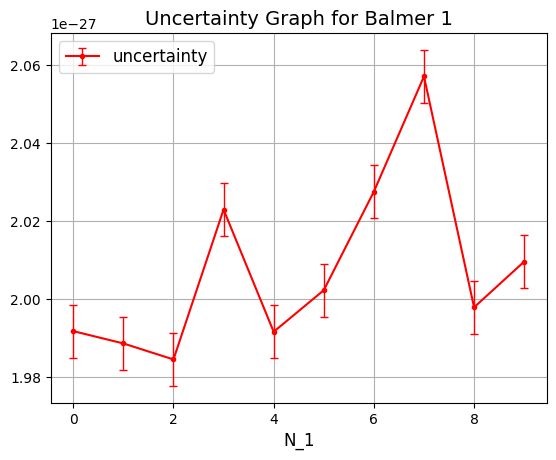

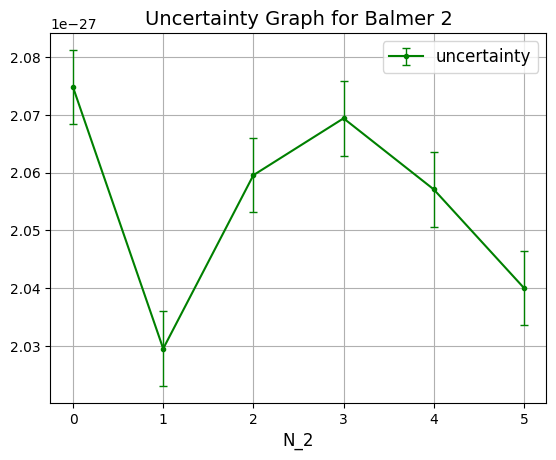

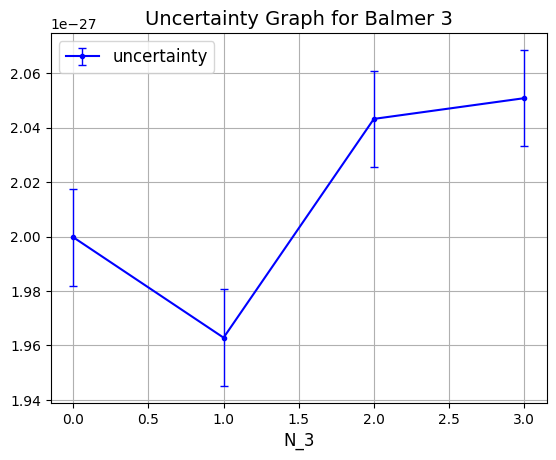

In [ ]:
unscaled_mark, intensity=read_data()
m_n_values=calculate_neutron_mass()
print(len(m_n_values)) #Say 21, which is what we would like to see
print(m_n_values[1]) #Making sure it is already enumerated
print(len(m_n_values[0:10]))

'''
I had to take the absolute value of all the average data because I think I made a mistake somewhere in the formula writing but I just cannot find it.
'''
def spread_based_analysis(m_n_values):
  avg_Balmer_m_n=[]
  u_Balmer_m_n=[]
  for i in range(0,10):
    sum_Balmer_1=np.sum(m_n_values[0:10])
    std_Balmer_1=np.std(m_n_values[0:10])
    N_Balmer_1=len(m_n_values[0:10])
    avg_Balmer_1=np.abs(sum_Balmer_1/N_Balmer_1)
    uncertainty_Balmer_1=std_Balmer_1/np.sqrt(N_Balmer_1)
  avg_Balmer_m_n.append(avg_Balmer_1)
  u_Balmer_m_n.append(uncertainty_Balmer_1)

  print(f"The final value of neutron mass with its uncertainty for Balmer 1:")
  print(f"{avg_Balmer_1}±{uncertainty_Balmer_1}")
  print(f"STDEV Balmer 1: {std_Balmer_1}")

  for i in range(10,16):
    sum_Balmer_2=np.sum(m_n_values[10:16])
    std_Balmer_2=np.std(m_n_values[10:16])
    N_Balmer_2=len(m_n_values[10:16])
    uncertainty_Balmer_2=std_Balmer_2/np.sqrt(N_Balmer_2)
    avg_Balmer_2=np.abs(sum_Balmer_2/N_Balmer_2)
  avg_Balmer_m_n.append(avg_Balmer_2)
  u_Balmer_m_n.append(uncertainty_Balmer_2)

  print(f"The final value of neutron mass with its uncertainty for Balmer 2:")
  print(f"{avg_Balmer_2}±{uncertainty_Balmer_2}")
  print(f"STDEV Balmer 2: {std_Balmer_2}")

  for i in range(16,20):
    sum_Balmer_3=np.sum(m_n_values[16:20])
    std_Balmer_3=np.std(m_n_values[16:20])
    N_Balmer_3=len(m_n_values[16:20])
    avg_Balmer_3=np.abs(sum_Balmer_3/N_Balmer_3)
    uncertainty_Balmer_3=std_Balmer_3/np.sqrt(N_Balmer_3)
  avg_Balmer_m_n.append(avg_Balmer_3)
  u_Balmer_m_n.append(uncertainty_Balmer_3)

  print(f"The final value of neutron mass with its uncertainty for Balmer 3:")
  print(f"{avg_Balmer_3}±{uncertainty_Balmer_3}")
  print(f"STDEV Balmer 3: {std_Balmer_3}")

  #FOR BALMER 4 IT IS IMPOSSIBLE TO DO THE UNCERTAINTY ANALYSIS DUE TO THE FACT THAT THERE IS ONLY ONE DATA FILE. However I will just do a calculation for the sake of it.
  sum_Balmer_4=np.sum(m_n_values[20])
  std_Balmer_4=np.std(m_n_values[20])
  N_Balmer_4=1
  avg_Balmer_4=np.abs(sum_Balmer_4/N_Balmer_4)
  uncertainty_Balmer_4=std_Balmer_4/np.sqrt(N_Balmer_4)

  print(f"The final value of neutron mass with its uncertainty for Balmer 4:")
  print(f"{avg_Balmer_4}±{uncertainty_Balmer_4}, but we know this is not very helpful due to N=1")
  return avg_Balmer_m_n, u_Balmer_m_n

avg_Balmer_m_n, u_Balmer_m_n=spread_based_analysis(m_n_values)
#print(avg_Balmer_m_n)
#print(u_Balmer_m_n)

#Turn into array for easier calculation:
avg_Balmer_m_n=np.array(avg_Balmer_m_n)
u_Balmer_m_n=np.array(u_Balmer_m_n)

'''
We can now calculate the weighted average using the three values for Balmer 1, 2, and 3 Line Data.
'''

print("==================================")


def weighted_average(avg_Balmer_m_n, u_Balmer_m_n):
  weight=1/(u_Balmer_m_n**2)
  m_n_best=np.sum(avg_Balmer_m_n*weight)/np.sum(weight)
  u_best=np.sqrt(1/np.sum(weight))
  print(f"The final weighted average of neutron mass:")
  print(f"{m_n_best}±{u_best} kg")
  return m_n_best

m_n_best=weighted_average(avg_Balmer_m_n, u_Balmer_m_n)

Balmer_1_m_n=np.array(m_n_values[0:10])
Balmer_2_m_n=np.array(m_n_values[10:16])
Balmer_3_m_n=np.array(m_n_values[16:20])

'''
Here I will create uncertainty ararys for Balmer 1, 2, and 3. Note I am using STDEV for the respective Balmer number for the individual calculations. And as we can see,
STDEV grows larger as we go up the Balmer number, which makes sense as the graphs were noisier as we went up the Balmer number.
'''
u_Balmer_1=np.array([6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30, 6.799461605960585e-30])
u_Balmer_2=np.array([6.446752578922886e-30, 6.446752578922886e-30, 6.446752578922886e-30, 6.446752578922886e-30, 6.446752578922886e-30, 6.446752578922886e-30])
u_Balmer_3=([1.7728730138094855e-29, 1.7728730138094855e-29, 1.7728730138094855e-29, 1.7728730138094855e-29])


#def plot_error_bar_graph(Balmer_1_m_n, Balmer_2_m_n, Balmer_3_m_n, u_Balmer_1, u_Balmer_2, u_Balmer_3):

x_axis_1 = np.arange(0, len(Balmer_1_m_n), step=1)
y1=np.abs(Balmer_1_m_n)
y1_1=u_Balmer_1

x_axis_2 = np.arange(0, len(Balmer_2_m_n), step=1)
y2=np.abs(Balmer_2_m_n)
y2_2=u_Balmer_2

x_axis_3 = np.arange(0, len(Balmer_3_m_n), step=1)
y3=np.abs(Balmer_3_m_n)
y3_3=u_Balmer_3

fig=plt.figure()
plt.errorbar(x_axis_1, y1, yerr = y1_1, linestyle = "-", marker = "o", markersize = 3, c = 'r', elinewidth = 1, capsize = 3, label = "uncertainty")
plt.title("Uncertainty Graph for Balmer 1", fontsize = 14)
plt.xlabel("N_1", fontsize = 12)
plt.ylabel("", fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()

fig=plt.figure()
plt.errorbar(x_axis_2, y2, yerr = y2_2, linestyle = "-", marker = "o", markersize = 3, c = 'g', elinewidth = 1, capsize = 3, label = "uncertainty")
plt.title("Uncertainty Graph for Balmer 2", fontsize = 14)
plt.xlabel("N_2", fontsize = 12)
plt.ylabel("", fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()

fig=plt.figure()
plt.errorbar(x_axis_3, y3, yerr = y3_3, linestyle = "-", marker = "o", markersize = 3, c = 'b', elinewidth = 1, capsize = 3, label = "uncertainty")
plt.title("Uncertainty Graph for Balmer 3", fontsize = 14)
plt.xlabel("N_3", fontsize = 12)
plt.ylabel("", fontsize = 12)
plt.legend(fontsize = 12)
plt.grid()

'''
From Wikipedia:
The accepted value of neutron mass=1.674927471e-27 kg
'''
accepted_m_n=1.674927471e-27
def compare_accepted_value(m_n_best):
  percent_error=np.abs((avg_m_n-accepted_m_n)/accepted_m_n)*100
  print(f"The percent error of the final value of the mass of the neutron is {percent_error}%")

#IS IT OKAY if I just do the rounding myself? Like the final average and the final uncertainty goes to  1.745+-0.0-3 e-27 kg

compare_accepted_value(m_n_best)